<a href="https://colab.research.google.com/github/avanegasp/Proyecto_Final_Ucataluna/blob/main/Proyecto_Final_UCatalu%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
viviendas = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Alura/main/inmuebles_bogota.csv')

In [8]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [148]:
copy_ind = viviendas.copy()

In [11]:
#Cambio el nombre de Baños y Área
columnas = {'Baños' : 'Banos', 'Área' : 'Area_m2'}
viviendas = viviendas.rename(columns = columnas)

In [5]:
viviendas.describe(include='object')

,Tipo,Descripcion,Barrio,UPZ,Valor
count,9520,9520,9520,9478,9520
unique,8,316,149,63,1039
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén,$ 450.000.000
freq,7327,916,1105,1681,128


In [13]:
columnas = {'UPZ':'UPL'}
viviendas = viviendas.rename(columns=columnas)

In [14]:
viviendas.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area_m2', 'Barrio',
       'UPL', 'Valor'],
      dtype='object')

In [16]:
viviendas.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
3201,Apartamento,Apartamento en venta en Quinta Paredes,3,2,80,Quinta Paredes,Teusaquillo,$ 528.000.000
8256,Casa,Casa en venta en Modelia,4,4,212,Modelia,Fontibón,$ 1.200.000.000
3240,Casa,Casa en venta en Engativa,3,2,72,Engativa,Engativá,$ 320.000.000
7009,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 110.533.500
9350,Apartamento,Apartamento en venta en Santa Barbara,2,2,70,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 460.000.000


In [95]:
viviendas.describe()

,Habitaciones,Banos,Area_m2
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


Se puede observar que hay que confirmar los datos máximos de habitaciones, área y mínimo de Baños

In [50]:
max_habi = viviendas.loc[viviendas['Habitaciones'] >= 110]
max_habi

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000


### Viviendas con 1 habitación

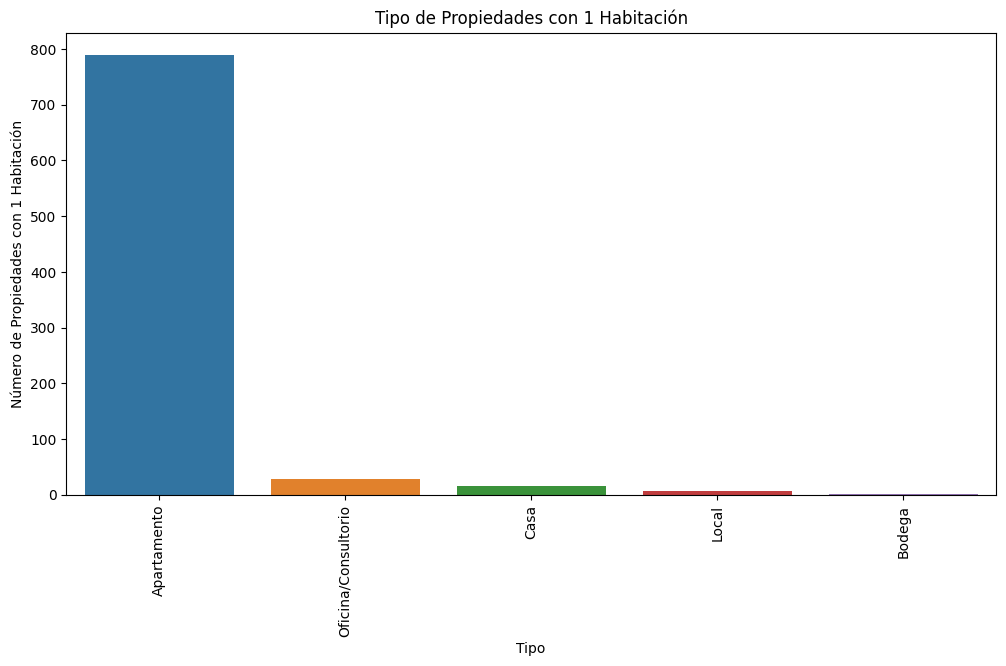

In [142]:
min_habi = viviendas.loc[viviendas['Habitaciones'] == 1]
conteo = min_habi['Tipo'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=conteo.index, y=conteo.values)
plt.xlabel("Tipo")
plt.ylabel("Número de Propiedades con 1 Habitación")
plt.title("Tipo de Propiedades con 1 Habitación")
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización
plt.show()

In [139]:
habi = viviendas.loc[viviendas['Habitaciones'] == 1]
habi['Tipo'].value_counts()

Apartamento            790
Oficina/Consultorio     28
Casa                    15
Local                    7
Bodega                   1
Name: Tipo, dtype: int64

### Viviendas con menos de 45 habitaciones

In [122]:
habi_box = viviendas.loc[viviendas['Habitaciones'] <= 45]
habi_box['Tipo'].value_counts()

Apartamento            7327
Casa                   2042
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

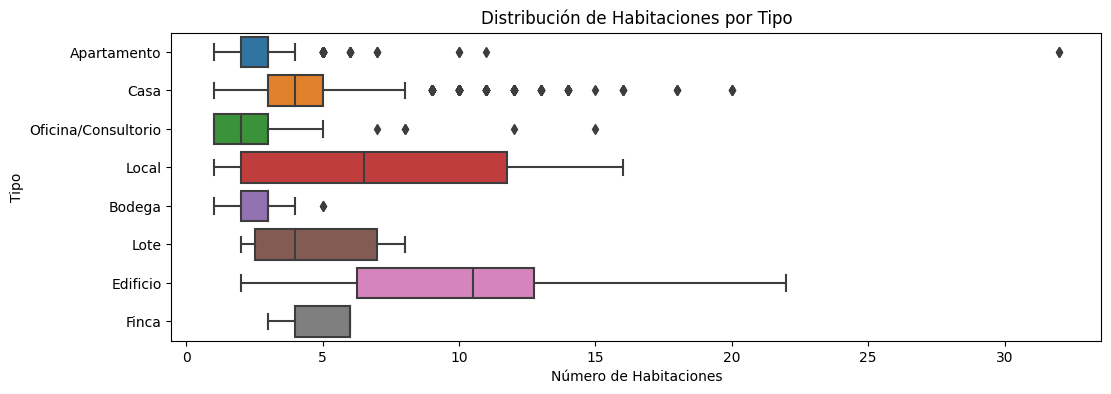

In [125]:
plt.figure(figsize=(12,4))
sns.boxplot(x=habi_box['Habitaciones'], y=habi_box['Tipo'])
plt.ylabel("Tipo")
plt.xlabel("Número de Habitaciones")
plt.title("Distribución de Habitaciones por Tipo")
plt.show()

Una casa tiene más de 100 habitaciones

### Viviendas con áreas mayores a 13000 m2

In [67]:
max_area = viviendas.loc[viviendas['Area_m2'] >= 13000]
max_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.250.000.000
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,$ 850.000.000


In [94]:
min_area = viviendas.loc[viviendas['Area_m2'] <= 10]
min_area

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000
9256,Apartamento,Apartamento en venta en Rafael Uribe Uribe,2,1,5,Rafael Uribe Uribe,Los Alcázares,$ 200.000.000


### Viviendas con 0 baños

In [54]:
max_banos = viviendas.loc[viviendas['Banos'] == 0]
max_banos

,Tipo,Descripcion,Habitaciones,Banos,Area_m2,Barrio,UPL,Valor
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000


## Imputaciones

In [145]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area_m2       9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [152]:
viviendas_null = viviendas['UPL'].isnull().sum()
viviendas_null

42

#### Eliminación de los null en las filas

In [156]:
#Hay 42 datos nulos perteneciente a 1 columnas
viviendas.isnull().sum(axis = 0).value_counts()

0     7
42    1
dtype: int64

In [157]:
#La columna que contiene los nulos
columnas_con_nulos = viviendas.columns[viviendas.isnull().any()]
print(columnas_con_nulos)

Index(['UPL'], dtype='object')


Se revisa que falta solo 1 datos en 42 filas, son UPL.

In [165]:
# Probar eliminando todos los null de las columnas
viviendas_1 = viviendas.dropna(axis=0)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_1.shape)

(9520, 8)
(9478, 8)


In [166]:
viviendas_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9478 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9478 non-null   object
 1   Descripcion   9478 non-null   object
 2   Habitaciones  9478 non-null   int64 
 3   Banos         9478 non-null   int64 
 4   Area_m2       9478 non-null   int64 
 5   Barrio        9478 non-null   object
 6   UPL           9478 non-null   object
 7   Valor         9478 non-null   object
dtypes: int64(3), object(5)
memory usage: 666.4+ KB


Se eliminan las filas con valores nulos

In [170]:
#Criterio para saber la perdida de data al borrar por filas
(viviendas.size - viviendas_1.size)*100/viviendas.size

0.4411764705882353

Con esta eliminación solo se borra un 4% de la data

---



#### Eliminación de los null en columnas

In [163]:
#Hay 42 datos nulos en 1 columna
viviendas.isnull().sum(axis = 1).value_counts()

0    9478
1      42
dtype: int64

In [164]:
# Probar eliminando todos los null de las columnas
viviendas_2 = viviendas.dropna(axis=1)

#risk_2.isnull().sum().sort_values(ascending = False)
print(viviendas.shape)
print(viviendas_2.shape)

(9520, 8)
(9520, 7)


In [171]:
#Criterio para saber la perdida de data al borrar por columnas
(viviendas.size - viviendas_2.size)*100/viviendas.size

12.5

Con esta eliminación se borra un 12% de la data, cantidad importante


### Imputación con la moda correspondiente

In [175]:
#Se trabajará en base a estos datos null por cada columna
viviendas_3 = viviendas.isnull().sum().sort_values(ascending = False)
viviendas_3

UPL             42
Tipo             0
Descripcion      0
Habitaciones     0
Banos            0
Area_m2          0
Barrio           0
Valor            0
dtype: int64